# Notebook for the study of the E.Coli Core model

# <font color='red'> [0] Build the model of E.Coli Core </font> 

## <font color='green'> [0.1] Importation of the package </font> 

In [1]:
import sys
sys.path.append('../')

from main import *

## <font color='green'> [0.2] Creation of the model variable and read the SBTab file </font> 

In [2]:
model = MODEL()

SBTab_file = "../Exemples/SBTab/Model.tsv"
model.read_SBtab(filepath=SBTab_file)

## <font color='green'> [0.3] Read of premade options files </font> 

Options file can be read to add enzymes to every reaction, to consider them and the external metabolites as parameters of the model.

In [3]:
file_path = "../Exemples/SBTab/options.csv"
model.setup(file_path=file_path)

Name of the removed parameter : Temperature


The same for adding regulation arrows between metabolite and flux of the model.

In [ ]:
file_reg = "../Exemples/SBTab/e_coli_core_regulation.tsv"
model.regulations.read_file(file_path=file_reg)

In [4]:
model.regulations.df

,Regulated flux,Regulator,Coefficient of regulation,Type regulation,Activated


## <font color='green'> [0.4] Display the Escher map of E.Coli Core </font> 

We can display the reference state in a Escher map

In [5]:
model_path = "../Exemples/SBTab/e_coli_core_model.json"
map_path = "../Exemples/SBTab/e_coli_core_map.json"

In [6]:
model.escher_reference(model_json=model_path, map_json=map_path)

Builder(height=600, metabolite_data={'acald_c': 0.95062685, 'coa_c': 2.74, 'nad_c': 4.2256266, 'accoa_c': 1.21…

# <font color='red'> [1] Launch simulation </font> 

## <font color='green'> [1.1] Response matrix </font> 

Once your model is well-built and the elasticity matrices are well-defined, you can compute the linear response matrix $R$ of the system to parameter perturbation

In [7]:
model.R

,enzyme_ACALD_para,enzyme_ACALDt_para,enzyme_ACKr_para,enzyme_ACONTa_para,enzyme_ACONTb_para,enzyme_ACt2r_para,enzyme_ADK1_para,enzyme_AKGDH_para,enzyme_ATPM_para,enzyme_Biomass_Ecoli_core_w_GAM_para,...,h_e_para,co2_e_para,for_e_para,fum_e_para,glc_e_para,h2o_e_para,nh4_e_para,o2_e_para,pi_e_para,succ_e_para
acald_c,-0.580812,1.419188,0.160367,-0.083215,-0.083215,0.160367,-0.014744,-0.003512,0.096071,-0.002360,...,0.282965,-0.179206,-0.032658,0.018380,0.026429,-0.046334,-0.006443,-0.010440,-0.004343,0.087498
coa_c,-0.179601,-0.179601,-0.082955,0.100334,0.100334,-0.082955,0.021930,-0.075198,-0.037542,0.011245,...,-0.599633,0.003204,0.101298,-0.196905,0.026206,0.325284,0.030699,0.046552,0.020691,-0.243067
nad_c,-0.206844,-0.206844,0.004400,-0.155695,-0.155695,0.004400,-0.020490,-0.076863,-0.069546,-0.000819,...,0.579012,0.188308,-0.077503,0.111039,-0.036330,-0.124616,-0.002237,-0.042840,-0.001508,-0.037993
accoa_c,0.298099,0.298099,0.221957,-0.349907,-0.349907,0.221957,-0.028785,-0.223468,0.076616,0.003673,...,0.136996,-0.032920,-0.095562,0.047800,0.006063,-0.085973,0.010028,0.006269,0.006759,-0.135246
h_c,-0.053012,-0.053012,0.024622,-0.027579,-0.027579,0.024622,-0.019753,-0.012480,-0.061108,0.001213,...,0.987325,0.054329,-0.023462,0.014133,0.000340,0.069357,0.003311,-0.066275,0.002231,-0.008811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUCOAS,-0.001756,-0.001756,-0.028208,-0.028278,-0.028278,-0.028208,-0.021340,-0.167113,-0.010717,-0.001188,...,-0.016016,0.017973,-0.004090,-0.017323,0.001714,0.000115,-0.003243,-0.004587,-0.002186,0.012452
TALA,-0.006996,-0.006996,-0.001248,-0.015371,-0.015371,-0.001248,-0.008713,-0.012416,-0.014401,0.000498,...,-0.013260,0.002434,-0.003440,-0.001787,0.004707,-0.003270,0.001360,-0.000806,0.000916,-0.000312
TKT1,-0.006996,-0.006996,-0.001248,-0.015371,-0.015371,-0.001248,-0.008713,-0.012416,-0.014401,0.000498,...,-0.013260,0.002434,-0.003440,-0.001787,0.004707,-0.003270,0.001360,-0.000806,0.000916,-0.000312
TKT2,-0.007421,-0.007421,-0.000065,-0.014991,-0.014991,-0.000065,-0.007049,-0.012844,-0.009793,0.000317,...,-0.012014,0.003003,-0.003192,-0.002159,0.004273,-0.003118,0.000864,-0.000961,0.000582,-0.000647


## <font color='green'> [1.2] Covariance matrix </font> 

The uncertainty on the parameters spreads through the cell and then leads to a certain variability in the internal components of the cell's metabolism

In [8]:
model.rho()

,enzyme_ACALD_para,enzyme_ACALDt_para,enzyme_ACKr_para,enzyme_ACONTa_para,enzyme_ACONTb_para,enzyme_ACt2r_para,enzyme_ADK1_para,enzyme_AKGDH_para,enzyme_ATPM_para,enzyme_Biomass_Ecoli_core_w_GAM_para,...,PYK,RPE,RPI,SUCCt2_2,SUCCt3,SUCOAS,TALA,TKT1,TKT2,TPI
enzyme_ACALD_para,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.090530,-0.059450,0.046481,-0.005857,0.128324,-0.004279,-0.057348,-0.057348,-0.061509,-0.097793
enzyme_ACALDt_para,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.090530,-0.059450,0.046481,-0.005857,0.128324,-0.004279,-0.057348,-0.057348,-0.061509,-0.097793
enzyme_ACKr_para,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.024649,-0.005417,0.032941,-0.091192,0.038729,-0.068737,-0.010232,-0.010232,-0.000542,-0.046318
enzyme_ACONTa_para,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.023083,-0.125204,0.127829,-0.031764,0.096826,-0.068908,-0.125998,-0.125998,-0.124259,0.036967
enzyme_ACONTb_para,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.023083,-0.125204,0.127829,-0.031764,0.096826,-0.068908,-0.125998,-0.125998,-0.124259,0.036967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUCOAS,-0.004279,-0.004279,-0.068737,-0.068908,-0.068908,-0.068737,-0.052001,-0.407225,-0.026117,-0.002895,...,0.111536,0.260003,-0.223274,0.014794,-0.091586,1.000000,0.254294,0.254294,0.265479,-0.076139
TALA,-0.057348,-0.057348,-0.010232,-0.125998,-0.125998,-0.010232,-0.071423,-0.101779,-0.118046,0.004082,...,0.033216,0.999440,-0.987290,0.046781,0.061923,0.254294,1.000000,1.000000,0.997735,-0.187627
TKT1,-0.057348,-0.057348,-0.010232,-0.125998,-0.125998,-0.010232,-0.071423,-0.101779,-0.118046,0.004082,...,0.033216,0.999440,-0.987290,0.046781,0.061923,0.254294,1.000000,1.000000,0.997735,-0.187627
TKT2,-0.061509,-0.061509,-0.000542,-0.124259,-0.124259,-0.000542,-0.058429,-0.106460,-0.081170,0.002624,...,0.049218,0.999427,-0.974363,0.047001,0.070541,0.265479,0.997735,0.997735,1.000000,-0.211276


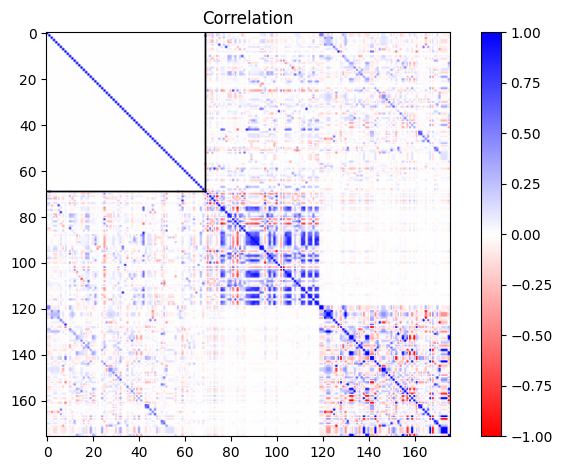

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Correlation'}>,
 <matplotlib.image.AxesImage at 0x78de2d09f010>)

In [9]:
model.plot(result="rho")

In [11]:
model.regulations.df

,Regulated flux,Regulator,Coefficient of regulation,Type regulation,Activated
direct inhibition f6p_c -> PFK,PFK,f6p_c,-1,allosteric,True
direct activation g6p_c -> PYK,PYK,g6p_c,1,allosteric,True


In [22]:
model.regulations.inactivate(name="direct inhibition f6p_c -> PFK")

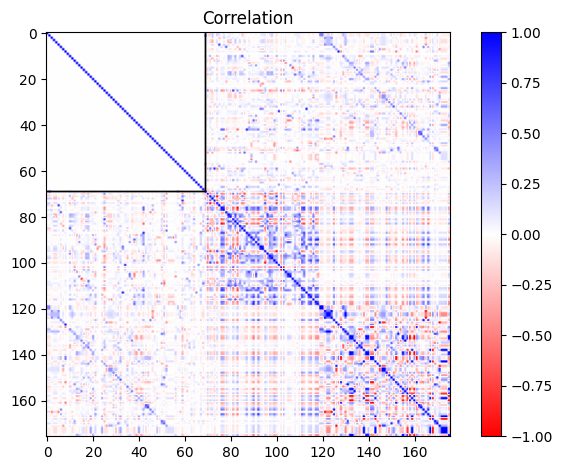

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Correlation'}>,
 <matplotlib.image.AxesImage at 0x78de2d11aad0>)

In [13]:
model.plot("rho")

and the mutual information

/home/alequertier/Documents/BadAss/Notebooks/../main.py:610: RuntimeWarning: invalid value encountered in log
  MI[i][j] = -0.5 * np.log(1 - self.__correlation[i][j] ** 2)


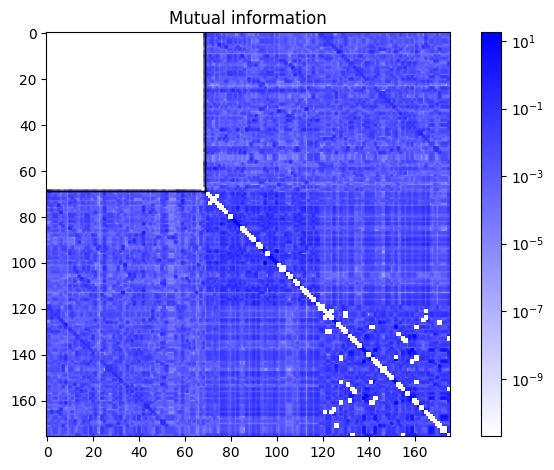

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Mutual information'}>,
 <matplotlib.image.AxesImage at 0x78de2c5dd600>)

In [14]:
model.plot(result="MI")

For a clearer analysis, you can display an Escher map of the mutual inforamtion between an element of the model and the metabolite

In [15]:
model.escher_meta(studied="enzyme_ACALD_para", result="MI", model_json=model_path, map_json=map_path)

Builder(height=600, metabolite_data={'acald_c': 0.05089010043818262, 'coa_c': 0.006967893159791854, 'nad_c': 0…

You can study the influence of the resolution of uncertainty of an element of the model by fixing its value

In [16]:
SD, mean = model.group_entropy_fixed_vector(elements_to_fixe="atp_c", elements_to_study=[], new_mean_fixed=4.0, return_all=True)

SD

,Old SD,New SD,Delta SD
enzyme_ACALD_para,1.000000,0.999986,0.000014
enzyme_ACALDt_para,1.000000,0.999986,0.000014
enzyme_ACKr_para,1.000000,0.998133,0.001867
enzyme_ACONTa_para,1.000000,0.999978,0.000022
enzyme_ACONTb_para,1.000000,0.999978,0.000022
...,...,...,...
SUCOAS,0.419607,0.415846,0.003761
TALA,0.124533,0.123992,0.000542
TKT1,0.124533,0.123992,0.000542
TKT2,0.124076,0.123192,0.000884


In [17]:
model.group_entropy_fixed_vector(elements_to_fixe=["atp_c"], elements_to_study=[], new_mean_fixed=[4.0])

-inf

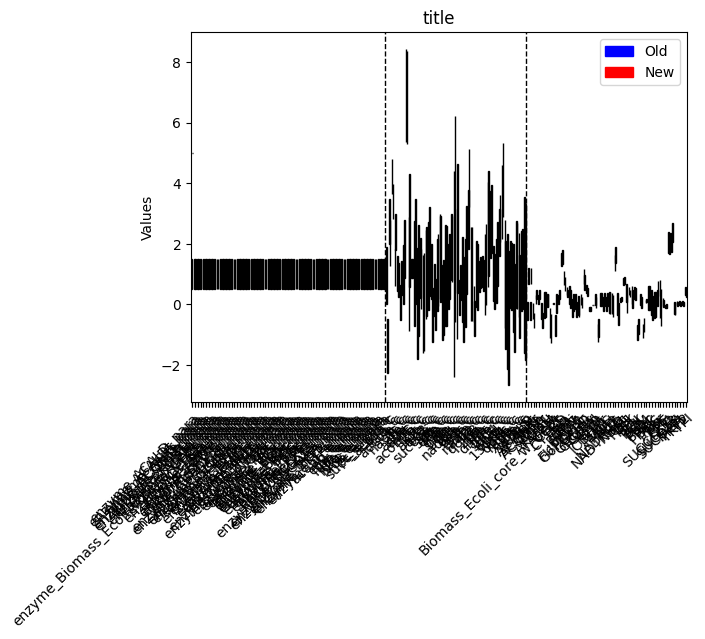

In [18]:
model.graphic_interface()

In [19]:
model.escher_mean_deviation(fixed_element="atp_c", fixed_value=4.0, model_json=model_path, map_json=map_path)

Builder(height=600, metabolite_data={'acald_c': -0.1980064045583832, 'coa_c': 0.7497301105014349, 'nad_c': -0.…

### We can also regroup enzyme into operon

In [20]:
enzyme_gly = ["PFK", "FBA", "TPI", "GAPD", "PGK", "PGM", "PYK"]

for i in range(len(enzyme_gly)) :
    enzyme_gly[i] = "enzyme_" + enzyme_gly[i]

model.operons.add(name="Glycolyse", enzymes_linked=enzyme_gly , mixed_covariance=0.5)


enzyme_phosphate = ["G6PDH2r", "GND", "TALA", "TKT2"]

for i in range(len(enzyme_phosphate)) :
    enzyme_phosphate[i] = "enzyme_" + enzyme_phosphate[i]

model.operons.add(name="pentose phosphate", enzymes_linked=enzyme_phosphate , mixed_covariance=0.5)

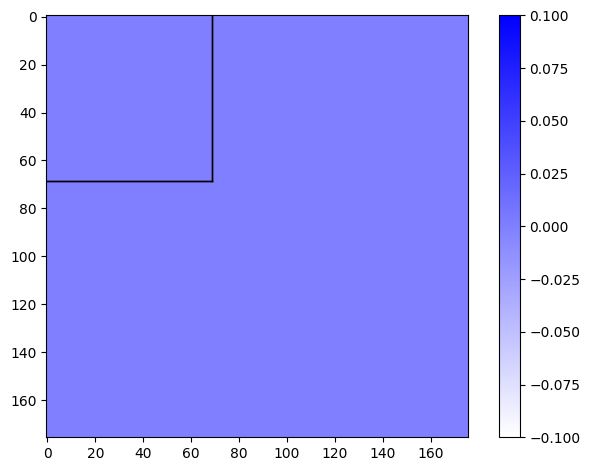

In [21]:
rho_0 = model.rho().to_numpy()

model.operons.inactivate("Glycolyse")
model.operons.inactivate("pentose phosphate")

rho_1 = model.rho().to_numpy()

index = columns = model.covariance.index
matrix = rho_0 - rho_1

mini = np.min(matrix)
maxi = np.max(matrix)
fig, ax = plt.subplots()

custom_map = matplotlib.colors.LinearSegmentedColormap.from_list("custom", ["white", "blue"])
im = plt.imshow(np.abs(matrix), cmap=custom_map, vmin=0, vmax=maxi)
fig.tight_layout()

# Plot of the black line to separate the parameters from the variables
# Width of the line
line_width = 1
# Number of parameters
N_para = model.parameters.df.shape[0]
# Position of the line
x_p_e = [-0.5, N_para - 0.5]
y_p_e = [N_para - 0.5, N_para - 0.5]
plt.plot(x_p_e, y_p_e, "black", linewidth=line_width)
plt.plot(y_p_e, x_p_e, "black", linewidth=line_width)

x_p = [-0.5, N_para - 0.5]
y_p = [N_para - 0.5, N_para - 0.5]
plt.plot(x_p, y_p, "black", linewidth=line_width)
plt.plot(y_p, x_p, "black", linewidth=line_width)

plt.colorbar()
plt.show()


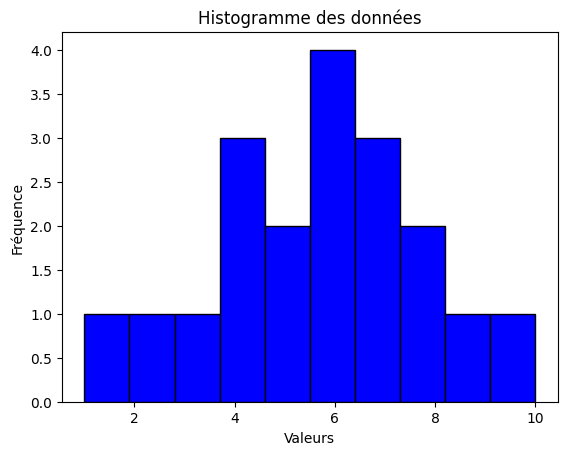

In [24]:
import matplotlib.pyplot as plt

# Données d'exemple
donnees = [1, 2, 3, 4, 4, 4, 5, 5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 9, 10]

# Tracer l'histogramme
plt.hist(donnees, bins=10, color='blue', edgecolor='black')

# Ajouter des titres et des étiquettes
plt.title('Histogramme des données')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')

# Afficher l'histogramme
plt.show()
